## Import the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## MNIST Fashion Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# Split into training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
# From the code above we can see that we have 60.000 images that are made up of 
# 28x28 pixels (784 in total)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
# For testing, we have 10.000 observations

In [7]:
# Below, we will take a look at one pixel

In [8]:
train_images[0, 23, 23]

194

In [9]:
# Our pixel values are between 0 and 255, 0 being black and 255 being white.

In [10]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
# Our labels are integers ranging from 0 to 9. Eacah integer is a specific article
# of clothing. We'll create an array of label names.

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Below, we will take a look at how our images look like

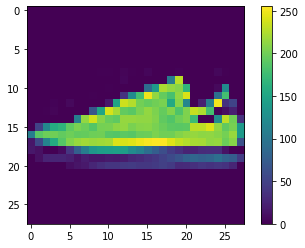

In [13]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

#### First, we will scale our greyscale pixel values to be between 0 and 1.

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
# Sequential = from the left side, to the right side, passing through the layers

## Creating the model

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

## Compiling the model

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [18]:
model.fit(train_images, train_labels, epochs=1) # data, labels and epochs(iterations)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.4959 - accuracy: 0.8245


## Evaluating the model

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print(f'Test accuracy: {test_acc}  -  Test loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.8457
Test accuracy: 0.8457000255584717  -  Test loss: 0.4265452027320862


## Making predictions

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions

array([[2.7897118e-05, 7.4327500e-07, 6.3485618e-06, ..., 1.7764787e-01,
        1.2748425e-03, 7.8176469e-01],
       [2.8523002e-04, 7.3708628e-07, 9.6381396e-01, ..., 2.3088695e-08,
        1.7836894e-05, 8.0759452e-09],
       [8.9219911e-06, 9.9992263e-01, 4.0097193e-06, ..., 6.6223329e-09,
        2.6123098e-07, 1.3959355e-09],
       ...,
       [2.8207267e-02, 1.4921990e-06, 1.2446607e-03, ..., 2.7774161e-04,
        9.0530026e-01, 2.3189741e-06],
       [6.1370670e-06, 9.9945170e-01, 7.5749140e-06, ..., 5.9156413e-08,
        3.6486682e-07, 8.8133260e-07],
       [7.4932259e-04, 2.4475396e-05, 1.7017670e-03, ..., 1.3979983e-01,
        2.3708409e-02, 1.0074971e-02]], dtype=float32)

In [22]:
predictions[5]

array([2.2388634e-03, 9.9062538e-01, 3.7666038e-04, 3.0091968e-03,
       3.4935854e-03, 8.1081153e-06, 2.2573605e-04, 6.0898844e-07,
       2.1569680e-05, 3.1350012e-07], dtype=float32)

## Verifying predictions

In [23]:
np.argmax(predictions[5])

1

In [24]:
print(class_names[np.argmax(predictions[5])])

Trouser


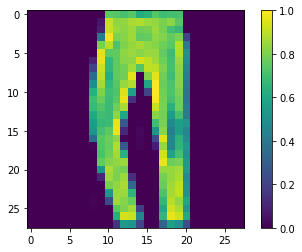

In [25]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 2


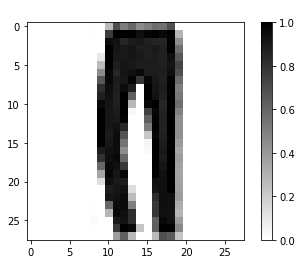

In [26]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)